# First, we create a listener class to stream tweets, get the json's and write them into a file called tweets.txt.
For that we need tweepy(which is a twitter library) and simplejson(which is a json parser).

In [49]:
import tweepy 
import simplejson as json
tweet_list=[]
class StreamListener(tweepy.StreamListener):
    
    def __init__(self, api=None):
        super(StreamListener, self).__init__()
        self.num_tweets=0
        self.file=open('tweets.txt','w')
    def on_status(self, status): 
        tweet= status._json
        self.file.write(json.dumps(tweet)+ '\n')
        tweet_list.append(status)
        self.num_tweets+=1
        if self.num_tweets <1000:
            return True
        else :
            return False
        self.file.close()
        
    
        

# Now we define a function which converts the status into json format, and writes them into a file line by line.
Since the number of tweets that can be streamed is 3200 per request, we still stream about 500 tweets only, coz 3200 is a lot, right?

# Now twitter allows users who have twitter accounts to use their api only, hence authentication using an Oauth token is a must.
We need these four keys listed below.

In [50]:
access_token = ''
access_token_secret=''
consumer_key = ''
consumer_key_secret=''

In [51]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)

# Now we just need to create an instance of that class and start streaming!

In [52]:
l= StreamListener()
stream= tweepy.Stream(auth, l)

Now here comes the fun part. We are going to filter tweets using keywords. I am going to search for words which are on everyone's mouths right now haha.
# 'Bitcoin, Ethereum, Bubble, Blockchain.'

In [53]:
stream.filter(track=['bitcoin','ethereum','bubble','blockchain'], languages=["en"])

# Load and Explore your streamed and filtered tweets

In [54]:
tweets_data_path='tweets.txt'
tweets_data=[]
tweets_file=open(tweets_data_path,'r')


# Convert these Raw Json's into strings and append all the tweets in an empty array. We can check for the keys of this dict.(Yes python stores json's as dicts)

In [56]:
for line in tweets_file:
    tweet=json.loads(line)
    tweets_data.append(tweet)

tweets_file.close()
print(tweets_data[0].keys())

['quote_count', 'contributors', 'truncated', 'text', 'is_quote_status', 'in_reply_to_status_id', 'reply_count', 'id', 'favorite_count', 'source', 'retweeted', 'coordinates', 'timestamp_ms', 'entities', 'in_reply_to_screen_name', 'in_reply_to_user_id', 'retweet_count', 'id_str', 'favorited', 'retweeted_status', 'user', 'geo', 'in_reply_to_user_id_str', 'possibly_sensitive', 'lang', 'created_at', 'filter_level', 'in_reply_to_status_id_str', 'place']


# Now for some twitter text analysis, convert these dicts into dataframes using pandas. 

In [60]:
import pandas as pd
df= pd.DataFrame(tweets_data, columns=['text', 'lang'])
print df.head()

                                                text lang
0  RT @RT_com: Bitcoin drops below $6,300, losing...   en
1  RT @Forbes: Bitcoin Cash Skyrockets, Bitcoin P...   en
2  RT @bitcoinpoet: Red Pill’s ICO Pre-Sale Is Go...   en
3  RT @everexio: Bitcoin Cash Update: We've liqui...   en
4  RT @flibbr: Full breakdown of the Roger 25k bt...   en


# Now we define a function which matches our filtered words from these dataframes. Like a simple search.

In [61]:
import re

def word_in_tweet(word, tweet):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, tweet)

    if match:
        return True
    return False

# We are incrementing the number of times that particular word was used by iterating over every row of that dataframe under the coumn 'text'

In [63]:
[bitcoin, ethereum, bubble, blockchain] =[0,0,0,0]
for index, row in df.iterrows():
    bitcoin += word_in_tweet('bitcoin', row['text'] )
    ethereum += word_in_tweet('ethereum', row['text'])
    bubble += word_in_tweet('bubble', row['text'])
    blockchain += word_in_tweet('blockchain', row['text'])


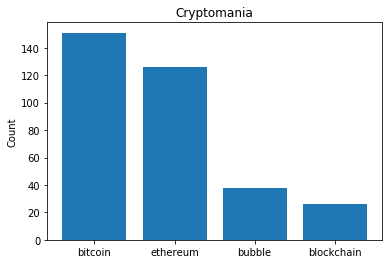

In [67]:
import matplotlib.pyplot as plt
lab= ['bitcoin','ethereum', 'bubble', 'blockchain']

plt.bar(lab, [bitcoin, ethereum, bubble, blockchain])
plt.xticks(['bitcoin', 'ethereum', 'bubble', 'blockchain'] )
plt.ylabel('Count')
plt.title('Cryptomania')
plt.show()
